## 1 Задание

### Построение графиков решений при разных $N_0$ и k

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

N_inf = 41950
k = 3.573
alpha = 0.7

def get_f(_k, _a):
    def f(N, t):
        return _k*N*(1-(N/N_inf)**_a)
    return f

n = 100
t_end = 10
t_eval = np.linspace(0, t_end, n+1)

#### Для стационарной точки 0

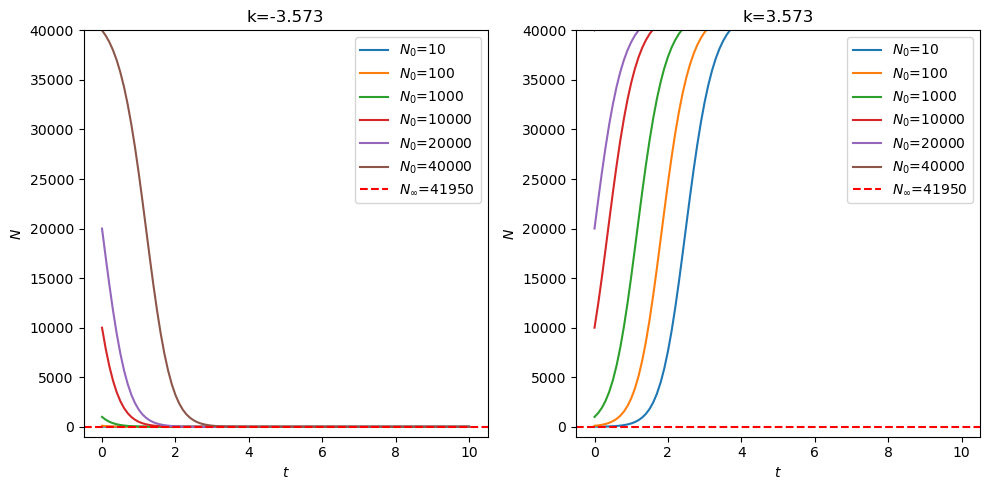

In [3]:
fig, ax = plt.subplots(1, 2, figsize = (5*2, 5), sharex=True, sharey=True)
for i, cur_k in enumerate([-3.573, 3.573]):
    rhs = get_f(cur_k, alpha)
    N_0 = np.array([10, 100, 1000, 10000, 20000, 40000])
    for _n in N_0:
        sol = odeint(rhs, [_n], t_eval)
        ax[i].plot(t_eval, sol, label='$N_0$={:.0f}'.format(_n))
    ax[i].axhline(y = 0, color = 'r', linestyle = '--', label = '$N_\infty$={:.0f}'.format(N_inf))
    ax[i].set_xlabel('$t$')
    ax[i].set_ylabel('$N$')
    ax[i].set_title(f'k={cur_k}')
    ax[i].set_ylim([-1000, 40000])
    ax[i].xaxis.set_tick_params(labelbottom=True)
    ax[i].yaxis.set_tick_params(labelbottom=True)
    ax[i].legend(loc='upper right')
fig.tight_layout()
plt.show()

#### Для стационарное точки $N_\infty$

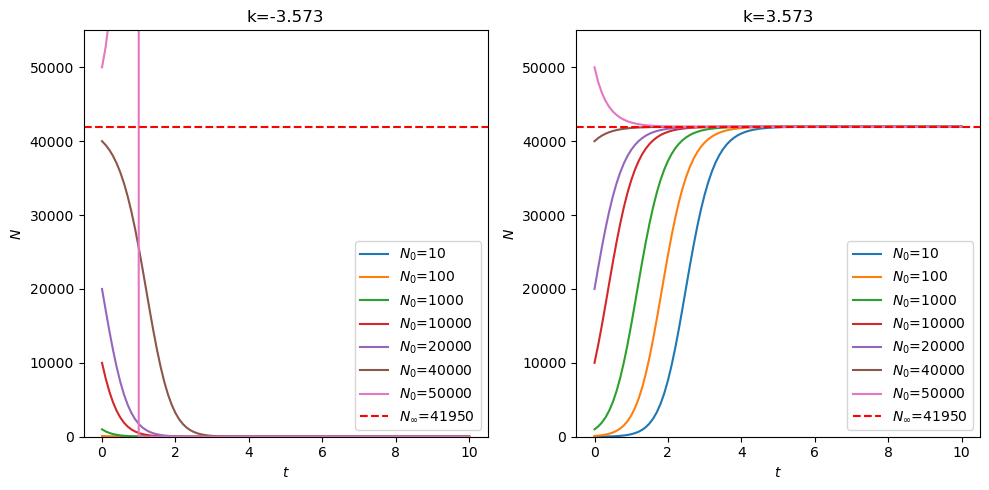

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (5*2, 5), sharex=True, sharey=False)
for i, cur_k in enumerate([-3.573, 3.573]):
    rhs = get_f(cur_k, alpha)
    N_0 = np.array([10, 100, 1000, 10000, 20000, 40000, 50000])

    for _n in N_0:
        sol = odeint(rhs, [_n], t_eval)
        ax[i].plot(t_eval, sol, label='$N_0$={:.0f}'.format(_n))
    ax[i].axhline(y = N_inf, color = 'r', linestyle = '--', label = '$N_\infty$={:.0f}'.format(N_inf))
    ax[i].set_xlabel('$t$')
    ax[i].set_ylabel('$N$')
    ax[i].set_ylim([0, 55000])
    ax[i].set_title(f'k={cur_k}')
    ax[i].xaxis.set_tick_params(labelbottom=True)
    ax[i].yaxis.set_tick_params(labelbottom=True)
    ax[i].legend()
fig.tight_layout()
plt.show()

## Бифуркация

### Построение бифуркационной диаграммы

Text(0.5, 1.0, 'Bifurcation diagram')

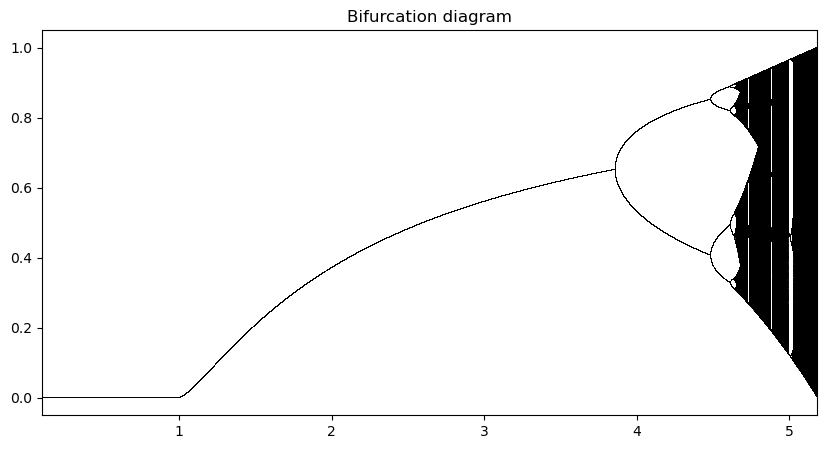

In [14]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.7

def logistic(r, x):
    y = r * x * (1 - x ** alpha)
    if isinstance(y, np.ndarray):
        y[y < 0] = 0.
    else:
        y = max(y, 0.)
    return y

r_lim = ((alpha + 1) ** (1./alpha + 1))/alpha
n = 100000
r = np.linspace(0.1, r_lim, n)
iterations = 5000
last = 200 # рисуем по последним точкам (их количество равно last)
x = 1e-5 * np.ones(n)
one_step = x

last_x = np.ones((last,n))

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
for i in range(iterations):
    if i == iterations - 1:
        one_step = x
    x = logistic(r, x)

    if i >= (iterations - last):
        last_x[last + i - iterations] = x
        ax1.plot(r, x, ',k', alpha=.25)

ax1.set_xlim(0.1, r_lim)
ax1.set_title("Bifurcation diagram")

### Нахождение точек бифуркации

In [15]:
cycle_len = 1
cycle_arr = np.ones(n)
last_i = n-1
bif_idx = [] # индексы точек бифуркаций в массиве значений параметра
bif_dots = [] # значения точек бифуркаций
r_cnt = 0
for i in range(n):
    _x = last_x[:,i]
    _x_shift = _x[cycle_len:]
    _x_shift_2 = _x[cycle_len*2:]
    if (not (np.abs(_x[:-cycle_len] - _x_shift) < 1e-6).all()) and (np.abs(_x[:-cycle_len*2] - _x_shift_2) < 1e-6).all():
        cycle_len *= 2
        bif_idx.append(i)
        bif_dots.append(r[i])
        r_cnt += 1
        print(f'r_{r_cnt} = {r[i]}')
    cycle_arr[i] = cycle_len
    if r_cnt == 6:
        break
    # if cycle_len*2 > last:
    #     last_i = i
    #     break

print(len(bif_dots))

r_1 = 3.8540847028777256
r_2 = 4.482577992041838
r_3 = 4.612342922671517
r_4 = 4.6402477197399445
r_5 = 4.646296300525268
r_6 = 4.647567010774286
6


In [16]:
for i in range(len(bif_dots) - 2):
    print(f'sigma_{i} =', (bif_dots[i+1] - bif_dots[i]) / (bif_dots[i+2] - bif_dots[i+1]))

sigma_0 = 4.843321582452017
sigma_1 = 4.650273224043582
sigma_2 = 4.613445378151533
sigma_3 = 4.759999999999525


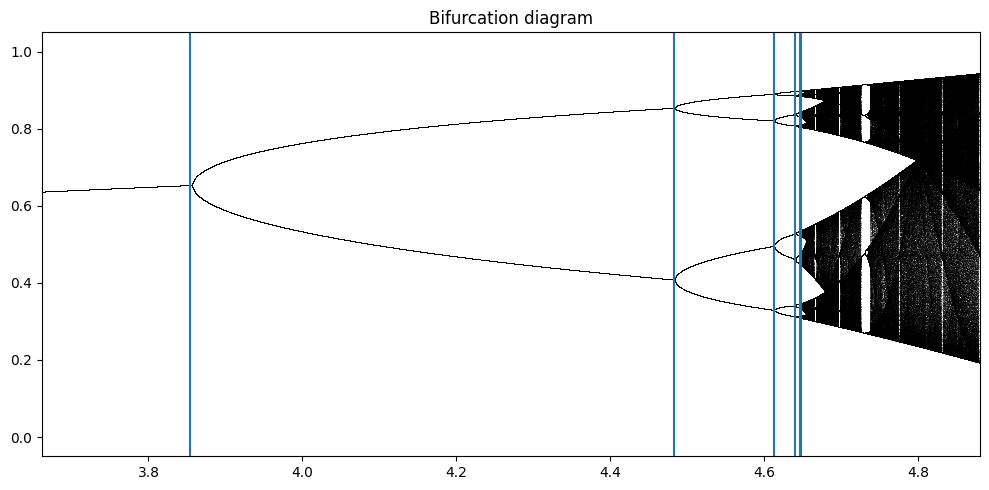

In [15]:
plt.figure(figsize=(10,5))

for i in range(0, last):
    plt.plot(r, last_x[i], ',k', alpha=.25)

for r_val in bif_dots:
    plt.axvline(x=r_val)

plt.xlim(bif_dots[0]*0.95, bif_dots[-1]*1.05)
plt.title("Bifurcation diagram")

plt.tight_layout()
plt.show()

### Поиск тройного цикла

In [17]:
n = 10000
r_tr = np.linspace(4.8, 5.2, n)
iterations = 1000
last = 100
x_tr = 1e-5 * np.ones(n)
one_step_tr = x_tr

last_x_tr = np.ones((last,n))

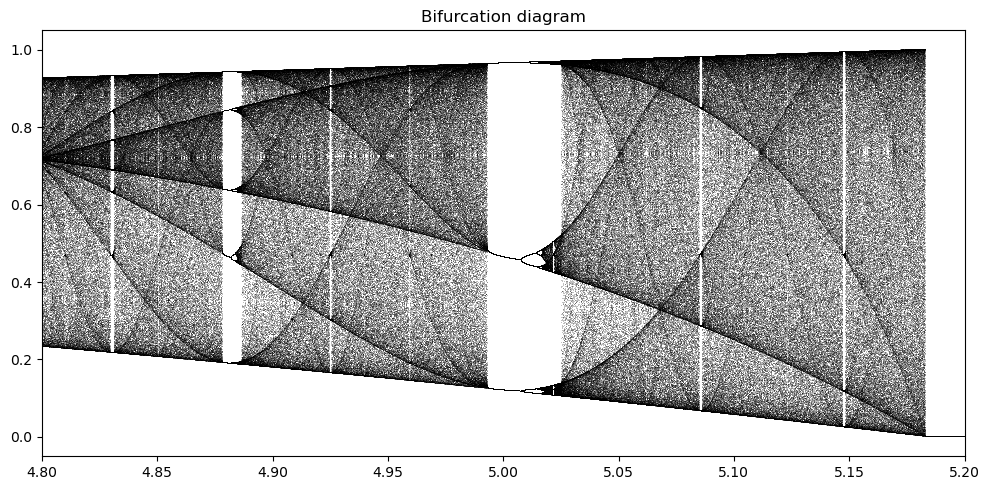

In [18]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
for i in range(iterations):
    if i == iterations - 1:
        one_step_tr = x_tr
    x_tr = logistic(r_tr, x_tr)
    # if i == 0:
    #     one_step_br = x_br
    if i >= (iterations - last):
        ax1.plot(r_tr, x_tr, ',k', alpha=.25)
        last_x_tr[last + i - iterations] = x_tr
# ax1.set_ylim(0.82, 0.86)
ax1.set_xlim(4.8, 5.2)
ax1.set_title("Bifurcation diagram")

plt.tight_layout()

In [19]:
cycle_arr = np.ones(n)
tri_circ_idx = None
tri_circ = None

for i in range(n):
    # print(r_tr[i])
    _x = last_x_tr[:,i]
    _x_shift_1 = _x[1:]
    _x_shift_3 = _x[3:]
    if (not (np.abs(_x[:-1] - _x_shift_1) < 0.0001).all()) and (np.abs(_x[:-3] - _x_shift_3) < 0.0001).all():
        tri_circ_idx = i
        tri_circ = r_tr[i]
        print(f'tricirc_point = {r_tr[i]}')
        break

tricirc_point = 4.993059305930593
